# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
import random 
import csv
import time
import os

from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
# out_put_data_file = "../output_data/cities.csv"

# need random numbers --- 600 bewtween -90 & 90 for lat
lat_numbers = []

for num in range(0, 2000):
    x = random.randint(-90,90)
    lat_numbers.append(x)

# need random numbers --- 600 between -180 & 180 for lng
lng_numbers = []

for num in range(0, 2000):
    y = random.randint(-180, 180)
    lng_numbers.append(y)

#shove numbers in dataframe in lat & lng columns
cities_fake_lat_lng_df = pd.DataFrame({"City": "", 
                          "Lat": lat_numbers,
                          "Lng": lng_numbers})

# get below per each lat & lng number
city_name = []


for index, row in cities_fake_lat_lng_df.iterrows():
    city = citipy.nearest_city(row["Lat"], row["Lng"])
    city_name.append(city.city_name)
    
# save in city name in DF & GET RID OF DUPLICATES
city_df = pd.DataFrame({"City": city_name})

city_df = city_df.drop_duplicates()
print(city_df.count())


city_df.head()

City    738
dtype: int64


,City
0,rikitea
1,bluff
2,esperance
3,shouguang
4,khorixas


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Ins_OpenWeatherRequest ---- for weather API (when we used it)
### 02-API-try-except/03-Ins_OpenWeatherRequest/Unsolved/Ins_OpenWeatherRequest.ipynb
# Ins_IterativeRequests ---- for multi requests
### 01-Intro-to-APIs/09-Ins_IterativeRequests/Unsolved/Ins_IterativeRequests.ipynb
# NearestRestr_SOLVED ---- for try, except errors
### 03-Google-Census/04-Ins_NearestRestr/Unsolved/NearestRestr_SOLVED.ipynb

##### ROAD MAP TO HOW TO DO THE BELOW: yays

### THEY DID THEIR EXAMPLE REQUESTS IN GROUPS OF 50
# Processing Record 1 of Set 1 | butaritari
# class example = for record #, need to figure out for set #

In [4]:
#looked it up -- need + instead of spaces for api lookup
city_df["City"] = city_df["City"].str.replace(' ', '+')

# was for testing
# city_df_mini = pd.DataFrame(city_df["City"][0:10])

#make empty columns
city_df['City Name'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness'] = ""
city_df['Wind Speed'] = ""
city_df['Country'] = ""
city_df['Date'] = ""

print("Beginning Data Retrieval")
print("-----------------------------")


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

set = 1
count = 0


for index, row in city_df.iterrows():
    # make query URLs (yay works)
    city = row['City']
    query_url = url + "appid=" + weather_api_key +"&q=" + city + "&units=" + units
    
    #get response json()
    response = requests.get(query_url).json()

    # SHOVE IT IN DATAFRAME IF EXISTS!!!!!!
    try: 
        print(f"Processing Record {count} Set {set} | {city}")
        city_df.loc[index, 'City Name'] = response['name']
        city_df.loc[index, 'Lat'] = response['coord']['lat']
        city_df.loc[index, 'Lng'] = response['coord']['lon']
        city_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        city_df.loc[index, 'Country'] = response['sys']['country']
        city_df.loc[index, 'Date'] = response['dt']
        count += 1
    except(KeyError, IndexError):
        print(f"City not found. Skipping...")
        count += 1
        
    if count == 50:
        set += 1
        time.sleep(60)
        count = 0
        


Beginning Data Retrieval
-----------------------------
Processing Record 0 Set 1 | rikitea
Processing Record 1 Set 1 | bluff
Processing Record 2 Set 1 | esperance
Processing Record 3 Set 1 | shouguang
Processing Record 4 Set 1 | khorixas
Processing Record 5 Set 1 | haibowan
City not found. Skipping...
Processing Record 6 Set 1 | lompoc
Processing Record 7 Set 1 | ushuaia
Processing Record 8 Set 1 | antigonish
Processing Record 9 Set 1 | yellowknife
Processing Record 10 Set 1 | hithadhoo
Processing Record 11 Set 1 | kopavogur
Processing Record 12 Set 1 | clyde+river
Processing Record 13 Set 1 | pochutla
Processing Record 14 Set 1 | pitea
Processing Record 15 Set 1 | mataura
Processing Record 16 Set 1 | kourou
Processing Record 17 Set 1 | ancud
Processing Record 18 Set 1 | flinders
Processing Record 19 Set 1 | tynset
Processing Record 20 Set 1 | zhigansk
Processing Record 21 Set 1 | new+norfolk
Processing Record 22 Set 1 | antofagasta
Processing Record 23 Set 1 | messini
Processing Recor

Processing Record 47 Set 4 | hofn
Processing Record 48 Set 4 | biltine
Processing Record 49 Set 4 | nikki
Processing Record 0 Set 5 | yagodnoye
Processing Record 1 Set 5 | nishihara
Processing Record 2 Set 5 | nikolskoye
Processing Record 3 Set 5 | mahebourg
Processing Record 4 Set 5 | guerrero+negro
Processing Record 5 Set 5 | samarai
Processing Record 6 Set 5 | khatanga
Processing Record 7 Set 5 | ambilobe
Processing Record 8 Set 5 | hovd
Processing Record 9 Set 5 | jiuquan
Processing Record 10 Set 5 | ponta+delgada
Processing Record 11 Set 5 | dikson
Processing Record 12 Set 5 | petropavlovsk-kamchatskiy
Processing Record 13 Set 5 | manbij
Processing Record 14 Set 5 | gualeguay
Processing Record 15 Set 5 | hilo
Processing Record 16 Set 5 | nha+trang
Processing Record 17 Set 5 | galiwinku
City not found. Skipping...
Processing Record 18 Set 5 | grand+river+south+east
City not found. Skipping...
Processing Record 19 Set 5 | mount+pleasant
Processing Record 20 Set 5 | puqi
Processing R

Processing Record 5 Set 9 | qixingtai
Processing Record 6 Set 9 | montepuez
Processing Record 7 Set 9 | dalbandin
Processing Record 8 Set 9 | lorengau
Processing Record 9 Set 9 | sechura
Processing Record 10 Set 9 | san+carlos+de+bariloche
Processing Record 11 Set 9 | sandy+bay
Processing Record 12 Set 9 | yurimaguas
Processing Record 13 Set 9 | rincon
Processing Record 14 Set 9 | flin+flon
Processing Record 15 Set 9 | tigil
Processing Record 16 Set 9 | blagoyevo
Processing Record 17 Set 9 | kyren
Processing Record 18 Set 9 | ivanteyevka
Processing Record 19 Set 9 | avera
Processing Record 20 Set 9 | la+rioja
Processing Record 21 Set 9 | praia+da+vitoria
Processing Record 22 Set 9 | altay
Processing Record 23 Set 9 | kosjeric
Processing Record 24 Set 9 | shubarshi
Processing Record 25 Set 9 | itoman
Processing Record 26 Set 9 | visnes
Processing Record 27 Set 9 | port+lincoln
Processing Record 28 Set 9 | zhoucheng
Processing Record 29 Set 9 | zachary
Processing Record 30 Set 9 | north+

Processing Record 6 Set 13 | ayutla
Processing Record 7 Set 13 | ilhabela
Processing Record 8 Set 13 | katete
Processing Record 9 Set 13 | aleksandrovka
Processing Record 10 Set 13 | vanavara
Processing Record 11 Set 13 | pinawa
Processing Record 12 Set 13 | temaraia
City not found. Skipping...
Processing Record 13 Set 13 | thanh+hoa
Processing Record 14 Set 13 | katherine
Processing Record 15 Set 13 | hamilton
Processing Record 16 Set 13 | khor
Processing Record 17 Set 13 | sungaipenuh
Processing Record 18 Set 13 | moroni
Processing Record 19 Set 13 | naze
Processing Record 20 Set 13 | omboue
Processing Record 21 Set 13 | jacqueville
Processing Record 22 Set 13 | kalomo
City not found. Skipping...
Processing Record 23 Set 13 | paita
Processing Record 24 Set 13 | mahajanga
Processing Record 25 Set 13 | san+quintin
Processing Record 26 Set 13 | coihaique
Processing Record 27 Set 13 | shimoda
Processing Record 28 Set 13 | mae+sai
Processing Record 29 Set 13 | amalapuram
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
city_df.head(10)

,City,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,Rikitea,-23.12,-134.97,73.67,80,0,17.07,PF,1603111965
1,bluff,Bluff,-46.6,168.33,46.99,85,96,18.01,NZ,1603111965
2,esperance,Esperance,-33.87,121.9,60.33,84,0,15.12,AU,1603111965
3,shouguang,Shouguang,36.88,118.74,61,50,0,7.05,CN,1603111965
4,khorixas,Khorixas,-20.37,14.97,103.03,7,0,3.42,NA,1603111966
5,haibowan,,,,,,,,,
6,lompoc,Lompoc,34.64,-120.46,54,96,0,4.21,US,1603111791
7,ushuaia,Ushuaia,-54.8,-68.3,39.18,74,96,21.61,AR,1603111667
8,antigonish,Antigonish,45.62,-62,50,97,100,4.36,CA,1603111966
9,yellowknife,Yellowknife,62.46,-114.35,21,96,100,1.99,CA,1603111967


In [40]:
# MAKE A FREAKING NEW DF SO YOU DON'T HAVE TO RUN IT AGAIN!!!!!!
city_df_clean = city_df.copy()
city_df_clean.head()

,City,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,Rikitea,-23.12,-134.97,73.67,80,0,17.07,PF,1603111965
1,bluff,Bluff,-46.6,168.33,46.99,85,96,18.01,NZ,1603111965
2,esperance,Esperance,-33.87,121.9,60.33,84,0,15.12,AU,1603111965
3,shouguang,Shouguang,36.88,118.74,61,50,0,7.05,CN,1603111965
4,khorixas,Khorixas,-20.37,14.97,103.03,7,0,3.42,NA,1603111966


In [7]:
# get rid of empty rows
city_df_clean['Lat'].replace("", np.nan, inplace=True)
city_df_clean.dropna(how="any", inplace=True)

# get rid of dup city column and rename right one
city_df_clean = city_df_clean.drop(columns=['City'])
city_df_clean = city_df_clean.rename(columns={'City Name': 'City'})

In [8]:
# reorder columns
city_df_clean = city_df_clean[['City','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']]

# # make csv & display
city_df_clean.to_csv(r'../output_data/cities.csv', index=False, header=True)
city_df_clean.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,Rikitea,-23.12,-134.97,73.67,80,0,17.07,1603111965,PF
1,Bluff,-46.60,168.33,46.99,85,96,18.01,1603111965,NZ
2,Esperance,-33.87,121.9,60.33,84,0,15.12,1603111965,AU
3,Shouguang,36.88,118.74,61,50,0,7.05,1603111965,CN
4,Khorixas,-20.37,14.97,103.03,7,0,3.42,1603111966,NA


In [9]:
city_df_stats = pd.DataFrame(city_df_clean[['Lat', 'Lng', 'Max Temp', 'Humidity', 
                                      'Cloudiness', 'Wind Speed', 'Date']].astype(int))

city_df_count = city_df_stats.count()
city_df_mean = city_df_stats.mean()
city_df_std = city_df_stats.std()
city_df_min = city_df_stats.min()
city_df_25 = city_df_stats.quantile(.25, axis=0)
city_df_5 = city_df_stats.quantile(.5, axis=0)
city_df_75 = city_df_stats.quantile(.75, axis=0)
city_df_max = city_df_stats.max()


city_df_stats_filled = pd.DataFrame({"count": city_df_count, "mean": city_df_mean,
                                          "std": city_df_std, "min": city_df_min,
                                          "25%": city_df_25, "50%": city_df_5,
                                          "75%": city_df_75, "max": city_df_max})
city_df_stats_filled = city_df_stats_filled.transpose()
city_df_stats_filled



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,6.800000e+02
mean,20.807353,17.551471,61.519118,69.805882,54.091176,7.338235,1.603112e+09
std,32.355257,89.328704,21.093094,23.293175,43.529354,5.964328,3.086547e+02
min,-54.000000,-179.000000,8.000000,7.000000,0.000000,0.000000,1.603112e+09
25%,-6.250000,-62.000000,46.000000,59.750000,1.000000,3.000000,1.603112e+09
50%,28.000000,21.000000,64.000000,75.000000,63.500000,6.000000,1.603112e+09
75%,47.000000,96.250000,79.000000,87.000000,100.000000,11.000000,1.603113e+09
max,78.000000,179.000000,103.000000,100.000000,100.000000,44.000000,1.603113e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

* humidity max = 100 so you are good to go :D 



In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
# for reference & plotting data below:
city_df_clean.head()
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,Rikitea,-23.12,-134.97,73.67,80,0,17.07,1603111965,PF
1,Bluff,-46.60,168.33,46.99,85,96,18.01,1603111965,NZ
2,Esperance,-33.87,121.9,60.33,84,0,15.12,1603111965,AU
3,Shouguang,36.88,118.74,61,50,0,7.05,1603111965,CN
4,Khorixas,-20.37,14.97,103.03,7,0,3.42,1603111966,NA


## Latitude vs. Temperature Plot

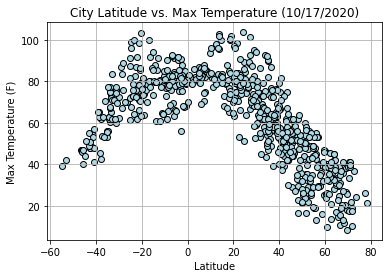

In [13]:
x_lat = city_df_clean['Lat']
y_max_temp = city_df_clean['Max Temp']

plt.scatter(x_lat, y_max_temp, color="lightblue", edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (10/19/2020)")
plt.grid(True)
plt.savefig("../output_data/Fig 1.png")

plt.show()


## Analysis:
* Latitude is the distance measured south (max -90) or north (max 90) of the euator (0). 
* The graph below shows that temperatures in the south are warmer as it is edging towards their spring. Temperatures are high arond the equator as it recieves more direct sunlight then other areas.Unsurprisingly, temperatures north of the equater (espeically far north) are colder as we turn towardsfall.

## Latitude vs. Humidity Plot

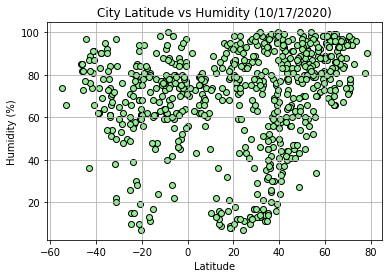

In [14]:
x_lat = city_df_clean['Lat']
y_humidity = city_df_clean['Humidity']

plt.scatter(x_lat, y_humidity, color="lightgreen", edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (10/19/2020)")
plt.grid(True)
plt.savefig("../output_data/Fig 2.png")

plt.show()

## Analysis: 
* There is high humidity around the world. Latitude does not exclude an area from humidity. There is however a very heavy cluster around latitude 60.      

## Latitude vs. Cloudiness Plot

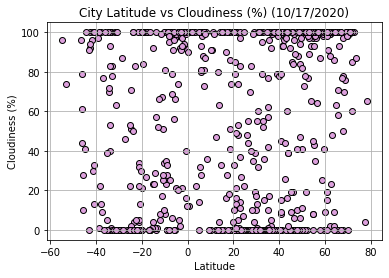

In [15]:
x_lat = city_df_clean['Lat']
y_cloudiness = city_df_clean['Cloudiness']

plt.scatter(x_lat, y_cloudiness, color="plum", edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%) (10/19/2020)")
plt.grid(True)
plt.savefig("../output_data/Fig 3.png")

plt.show()

## Analysis
* Similar to humidity, latiitude does note exclude an area from cloudiness. Surprisingly there are a lot of cities that have either 100 (rain or potentially overcast) or 0 (clear skies) on 10/19/2020. There are also groupings at 75 (mostly cloudy) and 40 (partially cloudy). This suddenly explains weather forecaster's lingo so much better.

## Latitude vs. Wind Speed Plot

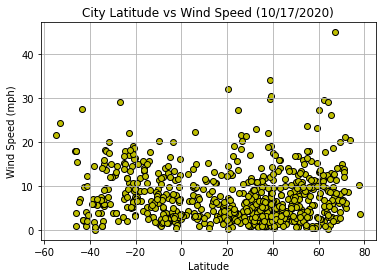

In [16]:
x_lat = city_df_clean['Lat']
y_wind_speed = city_df_clean['Wind Speed']

plt.scatter(x_lat, y_wind_speed, color="y", edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (10/19/2020)")
plt.grid(True)
plt.savefig("../output_data/Fig 4.png")

plt.show()

## Analysis
* Wind blows the world over. The vast majority of cities do not experience wind over 15 miles per hour. Roughy 2/3 are under 10 miles an hour. 

## Linear Regression

In [17]:
# make Northern Hemisphere DF
north_hemisphere_df = city_df_clean[city_df_clean['Lat'] > 0]

# make Souther Hemispher DF
south_hemisphere_df = city_df_clean[city_df_clean['Lat'] < 0]

north_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
3,Shouguang,36.88,118.74,61,50,0,7.05,1603111965,CN
6,Lompoc,34.64,-120.46,54,96,0,4.21,1603111791,US
8,Antigonish,45.62,-62,50,97,100,4.36,1603111966,CA
9,Yellowknife,62.46,-114.35,21,96,100,1.99,1603111967,CA
11,Kopavogur,64.11,-21.91,42.01,70,9,2.89,1603111967,IS


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7283821069762233


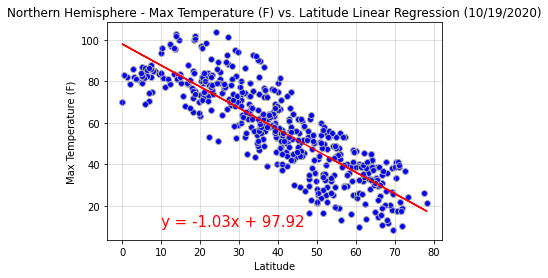

In [27]:
# Variables to be plotted/lined
north_x_lat = north_hemisphere_df['Lat']
north_y_max_temp = north_hemisphere_df['Max Temp']
north_lat_array = north_hemisphere_df.iloc[:,1].astype(float)
north_temp_array = north_hemisphere_df.iloc[:,3].astype(float)

# Scatter plot & friends
plt.scatter(north_x_lat, north_y_max_temp, color="blue", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression (10/19/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat_array, north_temp_array)

# regress - takes x * slope + intercept
regress_values = north_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(north_x_lat,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4244393724362455


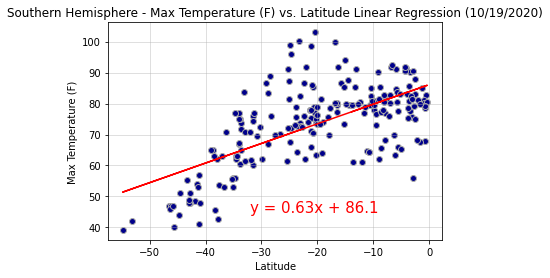

In [28]:
# Variables to be plotted/lined
south_x_lat = south_hemisphere_df['Lat']
south_y_max_temp = south_hemisphere_df['Max Temp']
south_lat_array = south_hemisphere_df.iloc[:,1].astype(float)
south_temp_array = south_hemisphere_df.iloc[:,3].astype(float)

# Scatter plot & friends
plt.scatter(south_x_lat, south_y_max_temp, color="darkblue", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression (10/19/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat_array, south_temp_array)

# regress - takes x * slope + intercept
regress_values = south_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(south_x_lat,regress_values,"r-")
plt.annotate(line_eq,(-32,45),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

## Linear Regression Max Temp Notes:
* North - There is a strong correlation between decending temperature and latitude approaching the pole.
* South - There is a weak correlation between ascending temperature and latitude approaching the equator.
* The expect north descending (approaching fall) and south ascending (approaching spring) is shown.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11313056357905144


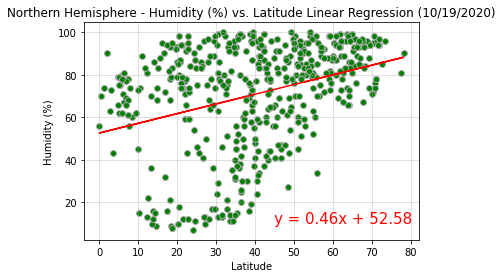

In [29]:
# Variables to be plotted/lined
north_x_lat = north_hemisphere_df['Lat']
north_y_humidity = north_hemisphere_df['Humidity']
north_lat_array = north_hemisphere_df.iloc[:,1].astype(float)
north_humidity_array = north_hemisphere_df.iloc[:,4].astype(float)

# Scatter plot & friends
plt.scatter(north_x_lat, north_y_humidity, color="green", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (10/19/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat_array, north_humidity_array)

# regress - takes x * slope + intercept
regress_values = north_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(north_x_lat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0013995982467293873


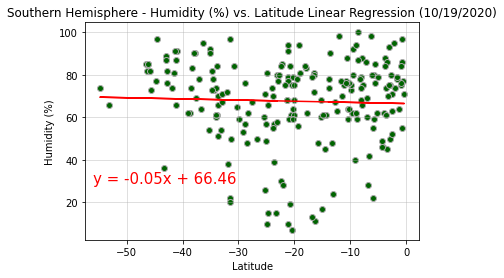

In [31]:
# Variables to be plotted/lined
south_x_lat = south_hemisphere_df['Lat']
south_y_max_temp = south_hemisphere_df['Humidity']
south_lat_array = south_hemisphere_df.iloc[:,1].astype(float)
south_temp_array = south_hemisphere_df.iloc[:,4].astype(float)

# Scatter plot & friends
plt.scatter(south_x_lat, south_y_max_temp, color="darkgreen", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (10/19/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat_array, south_temp_array)

# regress - takes x * slope + intercept
regress_values = south_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(south_x_lat,regress_values,"r-")
plt.annotate(line_eq,(-56,29),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

## Linear Regression Humidity Notes:
* North - There is no correlation between humidity and latitude approaching the pole.
* South - There is no correlation between humidity and latitude approaching the equator.
* Latidude does not play any great part in influencing humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06112652524164496


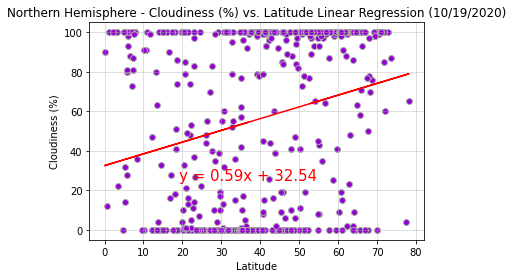

In [33]:
# Variables to be plotted/lined
north_x_lat = north_hemisphere_df['Lat']
north_y_cloud = north_hemisphere_df['Cloudiness']
north_lat_array = north_hemisphere_df.iloc[:,1].astype(float)
north_cloud_array = north_hemisphere_df.iloc[:,5].astype(float)

# Scatter plot & friends
plt.scatter(north_x_lat, north_y_cloud, color="darkviolet", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (10/19/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat_array, north_cloud_array)

# regress - takes x * slope + intercept
regress_values = north_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(north_x_lat,regress_values,"r-")
plt.annotate(line_eq,(19,25),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010207506217694532


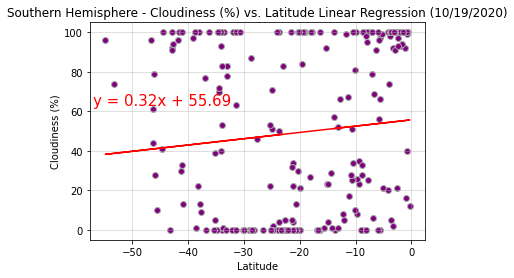

In [36]:
# Variables to be plotted/lined
south_x_lat = south_hemisphere_df['Lat']
south_y_cloud = south_hemisphere_df['Cloudiness']
south_lat_array = south_hemisphere_df.iloc[:,1].astype(float)
south_cloud_array = south_hemisphere_df.iloc[:,5].astype(float)

# Scatter plot & friends
plt.scatter(south_x_lat, south_y_cloud, color="purple", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (10/19/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat_array, south_cloud_array)

# regress - takes x * slope + intercept
regress_values = south_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(south_x_lat,regress_values,"r-")
plt.annotate(line_eq,(-57,63),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

## Linear Regression Cloudinesss Notes:
* North - There is no weak correlation between cloudiness and latitude approaching the pole.
* South - There is no correlation between cloudiness and latitude approaching the equator.
* Latidude does not play any great part in influencing cloudiness, though during summer monsoon weather or hurricane season, there would be stronger correlations. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02000960054220258


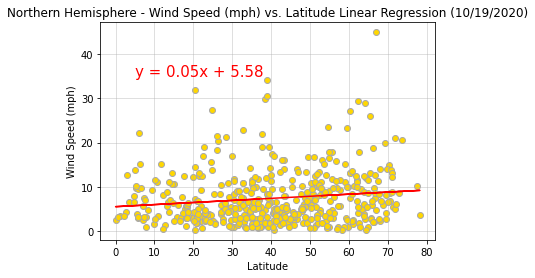

In [37]:
# Variables to be plotted/lined
north_x_lat = north_hemisphere_df['Lat']
north_y_wind = north_hemisphere_df['Wind Speed']
north_lat_array = north_hemisphere_df.iloc[:,1].astype(float)
north_wind_array = north_hemisphere_df.iloc[:,6].astype(float)

# Scatter plot & friends
plt.scatter(north_x_lat, north_y_wind, color="gold", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (10/19/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat_array, north_wind_array)

# regress - takes x * slope + intercept
regress_values = north_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(north_x_lat,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.040631991871456725


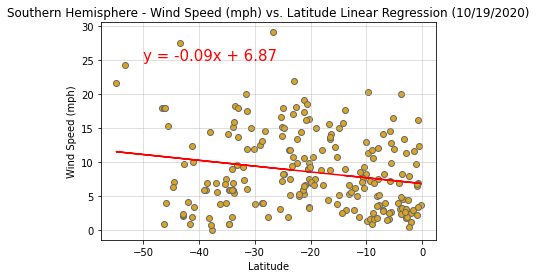

In [42]:
# Variables to be plotted/lined
south_x_lat = south_hemisphere_df['Lat']
south_y_wind = south_hemisphere_df['Wind Speed']
south_lat_array = south_hemisphere_df.iloc[:,1].astype(float)
south_wind_array = south_hemisphere_df.iloc[:,6].astype(float)

# Scatter plot & friends
plt.scatter(south_x_lat, south_y_wind, color="goldenrod", edgecolor='dimgray')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (10/19/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat_array, south_wind_array)

# regress - takes x * slope + intercept
regress_values = south_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(south_x_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

## Linear Regression Cloudinesss Notes:
* North - There is no correlation between cloudiness and latitude approaching the pole.
* South - There is no correlation between cloudiness and latitude approaching the equator.
* Latidude does not play any great part in influencing wind speed. However, like with cloudines seasonal extreme weather changes will come into affect, resulting in an increase in correlation.